<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center> <font color= #004A94> <font size = 6> Lic. Ingeniería Financiera </font> <br> <br> <font color= #AABCBB> <font size = 4>I.F. Karen Violeta García Hernandez - if707178@iteso.mx </font>

<center><font color=#50C8C4><font size=5> Laboratorio 2: Behavioral Finance </font> <br> <br>

<center> <font color= #004A94 > <font size = 4> Primavera 2020 </font>  |  <font color= #004A94> <font size = 4> Repositorio: <a href='https://github.com/violetarcia/LAB_02_KVGH.git'>Link</a></font>

______

<div style="text-align:center"><span style="color:#50C8C4; font-family:Georgia; font-size:2.2em;"> Resumen </span></div>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Este laboratorio tiene como propósito particular el elaborar herramientas para el análisis del desempeño de la actividad de trading, desde el punto de vista de la cuenta y desde el punto de vista de la persona que opera la cuenta (trader). Por lo tanto, este laboratorio estará dividido en 4 partes, cada una, servirá para cumplir con la estructura básica de proyectos para sistemas de trading y las otras 3 partes son relacionadas cada una a los propósitos del módulo completo. </p>

______

<div style="text-align:center"><span style="color:#50C8C4; font-family:Georgia; font-size:2.2em;"> Estructura </span></div>

> <span style="color:#004A94; font-family:Georgia; font-size:1.7em;"> Parte I </span>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> En la primera parte de este laboratorio, se definió la estructura básica de la forma en la que se trabajaría para abordar tal problemática, la cual, en términos generales, se define como:  </p>

- _La evaluación de un trader a través de su información histórica de operaciones en la cuenta que este mismo está a cargo, adhiriendo aspectos de behavioural finance._

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> El repositorio se constituye de la siguiente manera: </p>

| Elemento | Tipo | Contenido |
| :---:   | :-: | :-: |
| archivos | carpeta | Archivos con precios históricos |
| datos.py | Script de Python 3 | Variables y datos relevantes |
| funciones.py | Script de Python 3 | Funciones para procesamiento de datos |
| visualizaciones.py | Script de Python 3 | Funciones para visualización de datos |
| principal.py | Script de Python 3 | Ejecutar secuencialmente el proyecto completo |
| LAB_02.ipynb | Jupyter Notebook | Explicaciones del proyecto |
| README.md | Archivo de Markdown | Información basica del proyecto |

_______________

<div style="text-align:center"><span style="color:#50C8C4; font-family:Georgia; font-size:2.0em;"> Código </span></div>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> A continuación se desglosa el código con el cual se analizan las operaciones de una cuenta de OANDA </p>

In [1]:
import funciones as fn                              # Para procesamiento de datos
import visualizaciones as vs                        # Para visualizacion de datos

37.472973585128784


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

> <span style="color:#004A94; font-family:Georgia; font-size:1.7em;"> Parte II </span>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> El objetivo de esta parte es realizar mediciones de estadísticas básicas de una cuenta de trading. Para efectuar esto, es necesario empezar con el primer paso, el cual basicamente consiste en leer el archivo en excel que se encuentra en la carpeta de archivos, este mismo previamente se tuvo que descargar de la cuenta de trading de OANDA.</p>

In [2]:
# Leer archivo (el de Francisco es el 2)
data = fn.f_leer_archivo('archivo_tradeview_2.xlsx')
data.head()

,order,opentime,type,size,symbol,openprice,s/l,t/p,closetime,closeprice,commission,taxes,swap,profit
0,24311675,2019.08.27 06:18:03,sell,0.04,eurjpy,117.40700,117.7000,0.000,2019.08.27 06:20:11,117.42300,0.0,0,0,-0.61
1,24311730,2019.08.27 06:22:44,sell,0.04,eurjpy,117.38900,117.7000,0.000,2019.08.27 06:23:28,117.41200,0.0,0,0,-0.87
2,24311745,2019.08.27 06:23:44,sell,0.04,eurjpy,117.36800,0.0000,0.000,2019.08.27 06:24:13,117.40200,0.0,0,0,-1.29
3,24316034,2019.08.27 06:57:50,buy,0.04,xauusd,1529.21000,1523.0000,1543.000,2019.08.27 09:16:01,1533.69000,0.0,0,0,17.92
4,24315970,2019.08.27 06:52:01,sell,0.04,eurusd,1.11005,1.1126,1.107,2019.08.27 09:16:04,1.11027,0.0,0,0,-0.88


<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Como se observa, la función 'f_leer_archivo' requiere el nombre del archivo para indicarle cual es el archivo de excel que contiene las operaciones históricas del trader, el path . Otro punto a destacar es que, debido a la manera en que está programada tal función, es necesario que el nombre de la hoja sea 'Hoja1' así como contener las siguientes columnas:</p>

|    |  |  |    |  |  |    |  |  |
| :-:   | :-: | :-: | :-:   | :-: | :-: | :-:   | :-: | :-: |
|I   Order  I |  Size  I  |  Openprice  I|  S/L  I  |  T/P  I  |  Closeprice  I|  Taxes  I  |  Swap  I  | Profit  I|


<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Ya que la función se cerciora que estas columnas sean de tipo numérico debido a que estos datos son de suma importancia para el resto del proyecto.</p>


<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> A partir de esto, se le agrega columnas a 'data'. Una donde, con 'f_columna_tiempo', se calcula el tiempo en segundos de lo que duro cada operación abierta, es decir restando el closetime y el opentime. Una segunda columna que se le agrega es la de pips, a traves de la función 'f_columna_pips' cuya función tambien agrega otras dos columnas que son la de pips acumulado y el profit acumulado. Asimismo, a parte de estas columnas agregadas al archivo que ahora se encuentra en un objeto tipo DataFrame (data), tambien se calculan ciertas estadisticas básicas con la funcion de 'f_estadistica_ba' cuyas salidas son 2, la primera siendo df_1_tabla que es un DataFrame con tales calculos, y df_2_ranking que basicamente es el ranking de los instrumentos utilizados por el trader que fueron ganadoras. </p>

In [3]:
# Agregar la columna de los tiempos
fn.f_columna_tiempos(data)

# Agregar columna de pips
fn.f_columna_pips(data)

# DataFrames de Estadisticas basicas y ranking
df_estadistic = fn.f_estadistica_ba(data)
df_1_tabla = df_estadistic['estadisticas']
df_1_tabla

,Valor,Descripcion
Ops totales,84,Operaciones totales
Ganadoras,46,Operaciones ganadoras
Ganadoras_c,20,Operaciones ganadoras de compra
Ganadoras_v,26,Operaciones ganadoras de venta
Perdedoras,38,Operaciones perdedoras
Perdedoras_c,19,Operaciones perdedoras de compra
Perdedoras_v,19,Operaciones perdedoras de venta
Media (Profit),1.205,Mediana de profit de las operaciones
Media (Pips),3.6,Mediana de pips de las operaciones
r_efectividad,0.547619,Ganadoras Totales/Operaciones Totales


<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Se puede observar df_1_tabla, donde se pone el nombre de cada calculo en el indice, el valor de cada calculo en la columna 0 y su descripcion en la 1. A continuacion se muestra el ranking en donde se muestra que, de todas las operaciones hechas de tal instrumento, saber el porcentaje de las que tuvieron un resultado positivo (profit > 0)</p>

In [4]:
# DataFrame del ranking
df_2_ranking = df_estadistic['ranking']
df_2_ranking

,ranking
eurgbp,1.000000
btcusd,1.000000
usdmxn,0.800000
xauusd,0.736842
gbpusd,0.666667
usdjpy,0.600000
eurusd,0.478261
audusd,0.333333
eurjpy,0.285714
usdcad,0.285714


<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Graficamente se visualiza de la siguiente manera el ranking</p>

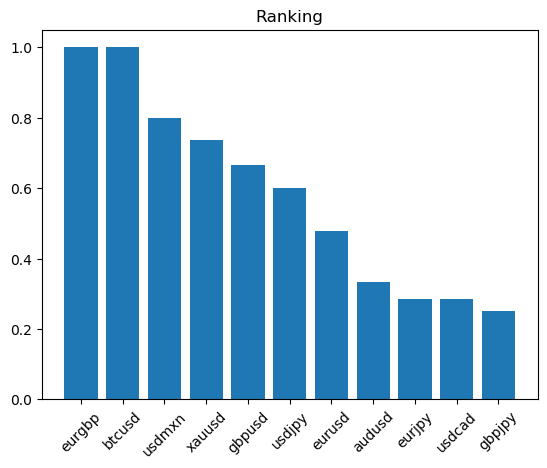

In [5]:
# Grafica de barras del ranking
vs.fig_rank

> <span style="color:#004A94; font-family:Georgia; font-size:1.7em;"> Parte III </span>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> El objetivo de esta tercera parte es calcular Medidas de Atribución al Desempeño expresadas semanalmente de la cuenta de trading y de la actividad del trader como persona. Se empieza calculando el capital acumulado a partir del capital inicial que se encuentra en el archivo datos.py en este caso es de $5,000 e ir sumando el profit y así tener esta nueva columna que muestra la evolución del capital de la cuenta a traves del tiempo por operación acomodada por closetime. Después de calcular esto con la función de 'f_columna_capital_acm' sigue generar un dataFrame donde se suma el profit (rendimiento) de todas las operaciones por dia, es decir, si se cerraron 3 operaciones en un mismo dia, sumar el profit de esas 3 operaciones para saber el rendimiento de tal dia, y así por dia dejando en 0 los dia en los que no se hicieron operaciones. De esta manera, en df_profit se encuentra la columna del dia, o sea timestamp, el rendimiento diario cuya columna se llama profit_d, otra columna del profit acumulado para ver el rendimiento acumulado. Después con la función de 'log_dailiy_rends' de la columna de profit_acm ya que se necesitara para futuros calculos.
</p>

In [6]:
# Agregar capital acumulado
fn.f_columna_capital_acm(data)

# DataFrame de profits
df_profit = fn.f_profit_diario(data)

# Agregar rendimientos del profit acumulado
fn.log_dailiy_rends(df_profit, 'profit_acm')

df_profit.head()

,timestamp,profit_d,profit_acm,rends
0,2019-08-27,27.61,5027.61,NaN
1,2019-08-28,5.00,5032.61,0.000994
2,2019-08-29,-1.52,5031.09,-0.000302
3,2019-08-30,-17.16,5013.93,-0.003417
4,2019-09-01,0.00,5013.93,0.000000


<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> A partir de tener este nuevo DataFrame 'df_profit', se calculan las medidas de atribución al desempeño con la columa de rends. </p>

In [7]:
# Estadisticas de metricas de desempeño
df_profit_estad = fn.f_estadisticas_mad(data)
df_profit_estad

,values
Sharpe,0.166968
Sortino_c,-0.136855
Sortino_v,0.153
Drawdown_capi,-190.48 | 2019-08-28 | 2019-09-03
Drawup_capi,421.83 | 2019-09-03 | 2019-09-25
Information,0.018439


<p style = "font-family: Calibri Light; font-size:1.4em;color:#50C8C4; LINE-HEIGHT:25px"> Sharpe: </p>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Mide el rendimiento promedio excedente sobre la tasa libre de riesgo por unidad de riesgo incurrido. Es decir, es un indicativo del rendimiento esperado del trader por encima de la tasa libre de riesgo descontando el riesgo en el que incurre.  Mientras sea mas alto el valor del ratio, significa que el numerador fue muy grande o que el denominador fue muy pequeño. Esto, en terminos financieros, podría interpretarse que un Sharpe es alto cuando se tiene un rendimiento excedente despues de la tasa libre de riesgo alto, y/o, que la volatilidad de los rendimientos de la estrategia de trading fue baja. Otra manera más simple de pensarlo es que el trader hizo mucho más rendimiento que el riesgo en el que incurre.</p>


<p style = "font-family: Calibri Light; font-size:1.4em;color:#50C8C4; LINE-HEIGHT:25px">Sortino Ratio:</p>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Derivado del Sharpe Ratio, el Sortio Ratio es una medida que incorpora 2 conceptos especiales: 1) el MAR o "Minimum Acceptable Return" (algunos fondos y profesionales se refieren a esto como DTR o Desired Target Return) y es el rendimiento promedio objetivo que se desea obtener del trader. 2) el TDD o "Target Downside Deviation" se calcula con los rendimientos por periodo que estén por debajo del MAR, es decir, TDD es la volatilidad de los rendimientos por debajo del rendimiento objetivo.</p> 


<p style = "font-family: Calibri Light; font-size:1.4em;color:#50C8C4; LINE-HEIGHT:25px">Drawdown / DrawUp:</p>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> La minusvalía/plusvalía máxima que se presentó en la evolución del capital. Esta medida puede ser calculada, tanto para información temporalmente medida en los mismos intervalos o equidistante (ej. rendimientos diarios) y también para información obtenida en intervalos distintos o no equidistante (ej: rendimiento por operación). Esto es posible ya que lo que se busca obtener de información es la fecha inicial, la fecha final y la magnitud del periodo donde la acumulación de pérdida/ganancia de capital resultó ser la mayor dentro del periodo de tiempo analizado.</p>


<p style = "font-family: Calibri Light; font-size:1.4em;color:#50C8C4; LINE-HEIGHT:25px">Information Ratio:</p>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Es una medida similar al Sharpe, con la diferencia de incorporar información del benchmark. En el cálculo de esta medida se reemplaza en el numerador la tasa libre de riesgo por el rendimiento del benchmark y en el denominador se utiliza la información de todos los rendimientos de la estrategia de trading una vez que se descuentan los rendimientos del benchmark. De tal manera que, al descontar la información del mercado para el rendimiento (numerador) como para la medida de riesgo (numerador) se está buscando tener una medida de la "información" extra que el trader tiene/genera o que logra capturar de comportamiento de los activos y que podría hacer que sus cifras sean mejores que las de un benchmark.</p>

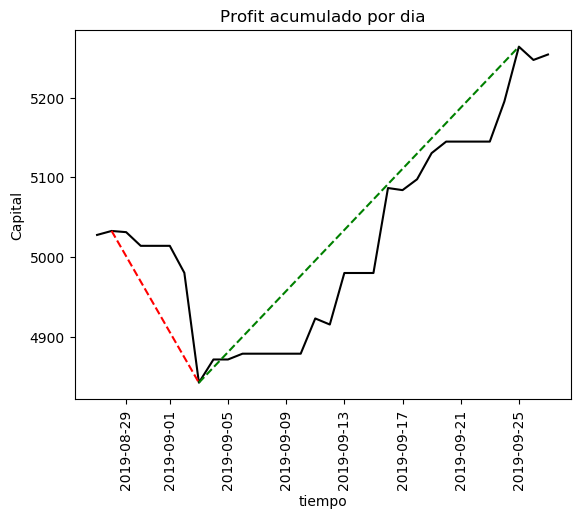

In [8]:
# Grafica de profit acumukado por dia
vs.fig_dd

> <span style="color:#004A94; font-family:Georgia; font-size:1.7em;"> Parte IV </span>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> El objetivo de esta cuarta y ultima parte es proponer, diseñar y calcular una función para obtener evidencia sobre la presencia de sesgos cognitivos en un trader.</p>

.

<span style="color:#AABCBB; font-family:Georgia; font-size:1.4em;"> Disposition Effect </span>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Este sesgo cognitivo propuesto por los autores Kahneman y Tversky, para el caso de trading, aplica como el efecto que se puede observar en el histórico de un trader sobre el hecho que tiende a cortar las ganancias rápido y mantener las pérdidas mucho tiempo, es decir, a materializar las ganancias mas frecuentemente que las pérdidas.</p>

In [10]:
# Operaciones ganadora vs perdedora (ocurrencia)
sesgos = fn.f_sesgos_cognitivo(data)

ocurrencias = fn.dataframe_ocurrencias(sesgos['ocurrencias'])
ocurrencias.head()

,CloseTime,Capital_acm,Ganadora,Gan_Profit,Gan/Cap_acm,Perdedora,Perdida_flotante,Perd/Cap_acm,Perd_Tot,Ratio cp/cg
0,2019-08-27 09:16:01,5015.15,xauusd,17.92,0.357,eurjpy,-8.439,0.168,1.32,0.471
1,2019-08-28 21:01:24,5032.61,eurjpy,5,0.099,eurjpy,-6.402,0.127,-9.98,1.28
2,2019-08-29 15:01:24,5050.93,gbpjpy,21.35,0.423,eurusd,-10.64,0.211,-25.64,0.498
3,2019-08-29 15:01:43,5056.89,gbpusd,5.96,0.118,eurusd,-10.64,0.21,-25.64,1.785
4,2019-08-30 02:53:33,5031.43,usdjpy,0.34,0.007,eurusd,-17.32,0.344,-25.64,50.941


In [11]:
sesgos['resultados']

,Valor
ocurrencias,27
status_quo,0.592593
aversion_perdida,0.37037
sensibilidad_decreciente,si
